In [228]:
import pandas as pd
import numpy as np
import random
from scipy import stats

df = pd.read_csv("/Users/ekarimi/PycharmProjects/saumap/SATSNE2019-master/toyData.csv", index_col=0)

glob = np.random.normal(loc=0, scale=30, size=200*df.shape[1]).reshape(-1,4)
glob += np.tile([0,0,100,100],200).reshape(-1,4)
timepoint_a = list(pd.cut(df['V1'], 3, labels=False))
timepoint_b = random.choices([0,1,2],k=glob.shape[0])
timepoint = np.array(timepoint_a+timepoint_b)
toydata = df.values
toydata1 = np.concatenate((toydata,glob))
toydata2 = np.concatenate((toydata,glob))

ix1 = random.choices([i for i in range(toydata1.shape[0])],k=800)
ix2 = random.choices([i for i in range(toydata2.shape[0])],k=1200)
Y1 = toydata1[ix1,:]
Y2 = toydata2[ix2,:]
Y1 = stats.zscore(Y1)
Y2 = stats.zscore(Y2)
timepoint1 = timepoint[ix1].reshape((len(ix1),1))
timepoint2 = timepoint[ix2].reshape((len(ix2),1))
ngenes1 = 100
ncells1 = Y1.shape[0]
np.random.seed(0)
proj1 = np.random.normal(size = ngenes1*Y1.shape[1]).reshape(ngenes1,Y1.shape[1])
A1 =  np.dot(Y1,proj1.T) + np.random.normal(size = ncells1*ngenes1).reshape(ncells1,ngenes1)
ngenes2 = 200
ncells2 = Y2.shape[0]
np.random.seed(10)
proj2 = np.random.normal(size = ngenes2*Y2.shape[1]).reshape(ngenes2,Y2.shape[1])
A2 =  np.dot(Y2,proj2.T) + np.random.normal(size = ncells2*ngenes2).reshape(ncells2,ngenes2)

X1shared = timepoint1.reshape(-1,1)
X2shared = timepoint2.reshape(-1,1)

# path = 'output/'
# np.savetxt(path+ "A1.txt", A1)
# np.savetxt(path+ "A2.txt", A2)
# np.savetxt(path+ "timepoint1.txt", timepoint1)
# np.savetxt(path+ "timepoint2.txt", timepoint2)

X1 = A1[:, :-1]
X2 = A2[:, :-1]

In [229]:
from tsne_ot import *
joint_coef = dict()



# initialization

In [310]:
w1_1 = timepoint1.reshape(-1) + np.random.normal(loc=0, scale=1, size=X1.shape[0])
w1_2 = timepoint1.reshape(-1) + np.random.normal(loc=0, scale=1, size=X1.shape[0])
w1 = np.array((w1_1,w1_2)).T

In [311]:
w1.shape

(800, 2)

In [312]:
w1 = -w1

In [313]:
w1.shape

(800, 2)

In [314]:
w2_1 = timepoint2.reshape(-1) + np.random.normal(loc=0, scale=1, size=X2.shape[0])
w2_2 = timepoint2.reshape(-1) + np.random.normal(loc=0, scale=1, size=X2.shape[0])
w2 = np.array((w2_1,w2_2)).T

In [315]:
w1.shape

(800, 2)

In [316]:
w2.shape

(1200, 2)

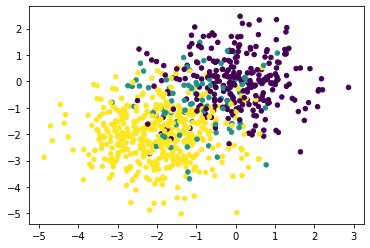

In [317]:
plt.scatter(w1[:,0], w1[:,1], 20, timepoint1)

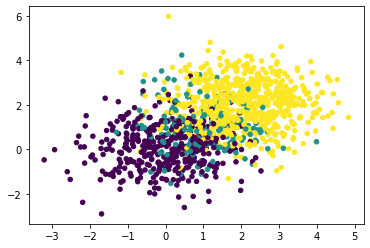

In [318]:
plt.scatter(w2[:,0], w2[:,1], 20, timepoint2)

In [319]:
from saumap.mnn import find_mutual_nn, find_nn, find_random_nn


In [320]:
mutual_1, mutual_2 = find_mutual_nn(w1, w2, 200, 200)
nn1, nn2 = find_nn(w1, mutual_1, w2, mutual_2)


In [321]:
init1 = w1 + w2[np.array(nn1)[nn1 != np.array(None)].astype(int)]
init2 = w2[nn2 != np.array(None)] + w1[np.array(nn2)[nn2 != np.array(None)].astype(int)]

In [329]:
np.multiply([nn1 != np.array(None)], nn1)

TypeError: unsupported operand type(s) for *: 'bool' and 'NoneType'

ValueError: 'c' argument has 800 elements, which is inconsistent with 'x' and 'y' with size 765.

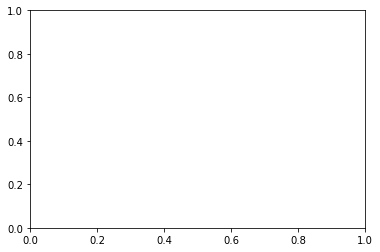

In [322]:
plt.scatter(init1[:,0], init1[:,1], 20, timepoint1)

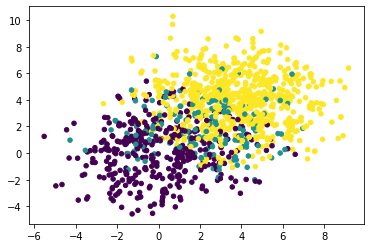

In [210]:
plt.scatter(init2[:,0], init2[:,1], 20, timepoint2)

In [211]:
n_repeat = 1
mmd_coef = 1.0
no_dims = 2
ts1_list, ts2_list ,time_list = generate_results(X1, X2, n_repeat, no_dims=no_dims,
                                                 perplexity=200, max_iter=400, mmd_coef = mmd_coef,
                                                initialization1=init1, initialization2=init2)
# tsne(X1, X2, no_dims=30, perplexity=70, max_iter=1000, mmd_coef = 1.0, mmd_radius=1.0,
# mmd_kernel= t_distribution_kernel_matrix):


********** replication:1 ********
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 800...
Computing P-values for point 500 of 800...
Mean value of sigma: 11.394290
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1200...
Computing P-values for point 500 of 1200...
Computing P-values for point 1000 of 1200...
Mean value of sigma: 9.307385
Iteration 10: error is 10.971619
Iteration 10: error is 12.617746
Iteration 20: error is 10.971619
Iteration 20: error is 12.617746
Iteration 30: error is 10.971619
Iteration 30: error is 12.617746
Iteration 40: error is 10.971619
Iteration 40: error is 12.617746
Iteration 50: error is 10.971619
Iteration 50: error is 12.617746
Iteration 60: error is 10.971619
Iteration 60: error is 12.617746
Iteration 70: error is 10.971619
Iteration 70: error is 12.617746
Iteration 80: error is 10.971619
Iteration 80: error is 12.617746
Iteration 90: error is 10.

In [212]:
import matplotlib.pyplot as plt 
import pylab
def final_embedding_plot(x1, x2, c1, c2):
    '''
    plotting 2D embeddings for each of two data-sets besides each other
    
    parameters
    ----------
    ts1 : an object of TSNE class
    ts2 : an object of TSNE class
    c1 : related labels to ts1 data-set
    c2 : related labels to ts2 data-set
        
    '''
    plt.figure(figsize=(30, 10), dpi=80)  # create a plot figure
    
#     x1, x2 = ts1.y2d, ts2.y2d

    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    plt.scatter(x1[:, 0], x1[:, 1], 20, c1)
    plt.subplot(1, 2, 2) # (rows, columns, panel number)
    plt.scatter(x2[:, 0], x2[:, 1], 20, c2)


def plot_togather(x1, x2, c1, c2):
        
#     x1, x2 = ts1.y2d, ts2.y2d

    ax = pylab.subplot(111)
    ax.scatter(x1[:, 0], x1[:, 1], 20, c1)
    ax.scatter(x2[:, 0], x2[:, 1], 20, c2)
    qqqq = ax.figure.show()

In [213]:
j = 0
ts1 = ts1_list[j]
ts2 = ts2_list[j]
# e1 = pca(ts1.Y, no_dims=2)
# e2 = pca(ts2.Y, no_dims=2)

In [214]:
# dom1 = np.zeros_like(timepoint1)
# dom2 = np.ones_like(timepoint2)
# col = np.concatenate((dom1, dom2), axis=0)



In [215]:
# # joint_coef = dict()
# run = dict()
# coef = 1
# run["embed1"] = ts1
# run["embed2"] = ts2
# run["col"] = col
# # joint_coef[15] = run
# joint_coef[mmd_coef] = run

In [216]:
# i = 4
# o = 4
# e1 = joint_coef[coef]['embed1'].Y[:,[i,o]]
# e2 = joint_coef[coef]['embed2'].Y[:,[i,o]]

# f0 = np.concatenate((e1[:, 0], e2[:, 0]), axis=0)
# f1 = np.concatenate((e1[:, 1], e2[:, 1]), axis=0)
# plt.scatter(f0, f1, 20, col,)
# plt.grid(which='major')
# # ax.scatter(x2[:, 0], x2[:, 1], 20, c2)
# # qqqq = ax.figure.show()

In [217]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharey=True)

# ax1.violinplot(ts1.Y)
# ax1.set_title('Domain1 violin plot')
# ax1.set_ylabel('embedding values')
# ax1.set_xlabel('dimensions')

# ax2.violinplot(ts2.Y)
# ax2.set_title('Domain2 violin plot')
# ax2.set_ylabel('embedding values')
# ax2.set_xlabel('dimensions')
# plt.show()


In [218]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharey=True)

# ax1.violinplot(ts1.Y)
# ax1.set_title('Domain1 violin plot coef='+str(mmd_coef))
# ax1.set_ylabel('embedding values')
# ax1.set_xlabel('dimensions')

# ax2.violinplot(ts2.Y)
# ax2.set_title('Domain2 violin plot coef='+str(mmd_coef))
# ax2.set_ylabel('embedding values')
# ax2.set_xlabel('dimensions')
# plt.show()



In [219]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharey=True)

# ax1.violinplot(ts1.Y)
# ax1.set_title('Domain1 violin plot coef='+str(mmd_coef))
# ax1.set_ylabel('embedding values')
# ax1.set_xlabel('dimensions')

# ax2.violinplot(ts2.Y)
# ax2.set_title('Domain2 violin plot coef='+str(mmd_coef))
# ax2.set_ylabel('embedding values')
# ax2.set_xlabel('dimensions')
# plt.show()




In [220]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), sharey=True)


# ax1.plot( np.array(ts1.ot_loss)*0.3 + ts1.ce_loss + ts2.ce_loss)
# ax1.set_title('all loss')
# ax1.set_ylabel('loss')
# ax1.set_xlabel('iterations')

# ax2.plot(np.array(ts1.ot_loss)*0.3)
# ax2.set_title('mmd loss')
# ax2.set_ylabel('loss')
# ax2.set_xlabel('iterations')

# ax3.plot(ts1.ce_loss)
# ax3.set_title('KL loss(1)')
# ax3.set_ylabel('loss')
# ax3.set_xlabel('iterations')

# ax4.plot(ts2.ce_loss)
# ax4.set_title('KL loss(2)')
# ax4.set_ylabel('loss')
# ax4.set_xlabel('iterations')


# plt.show()


In [221]:
# u1 = pca(ts1.Y, no_dims=2)
# u2 = pca(ts2.Y, no_dims=2)

<ipython-input-212-ac6469c732cf>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


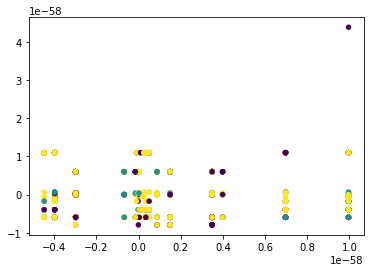

In [222]:
plot_togather(ts1.Y, ts2.Y, timepoint1, timepoint2)

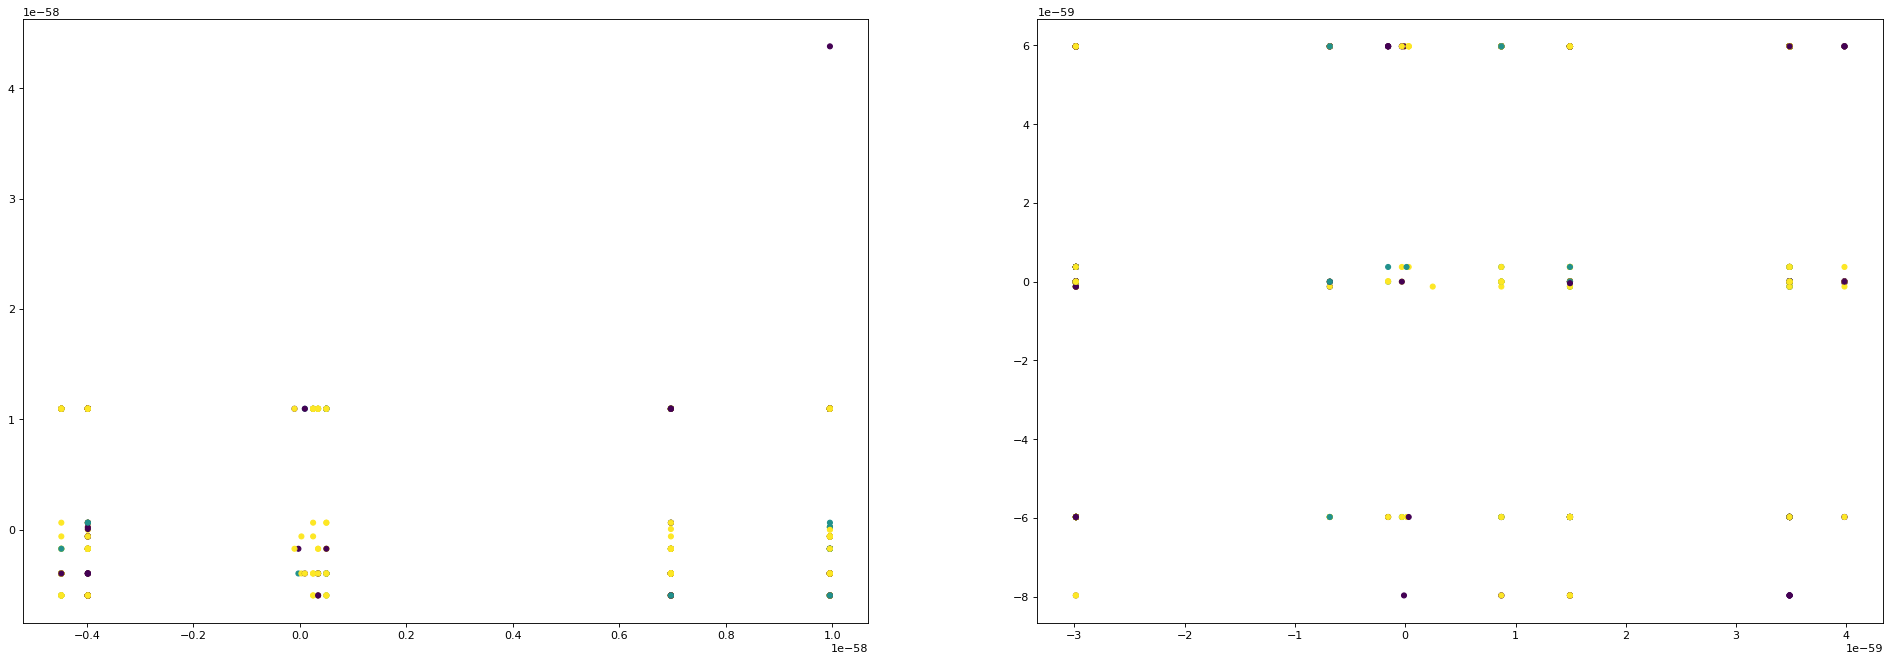

In [223]:
j=0
final_embedding_plot(
    ts1_list[j].Y,
    ts2_list[j].Y,
    timepoint1, timepoint2)

<ipython-input-212-ac6469c732cf>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


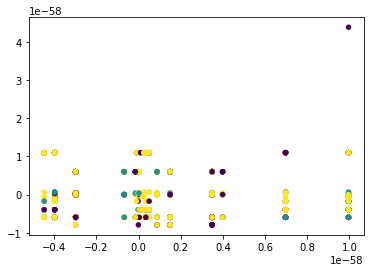

In [224]:
plot_togather(ts1_list[j].Y, ts2_list[j].Y, timepoint1, timepoint2)

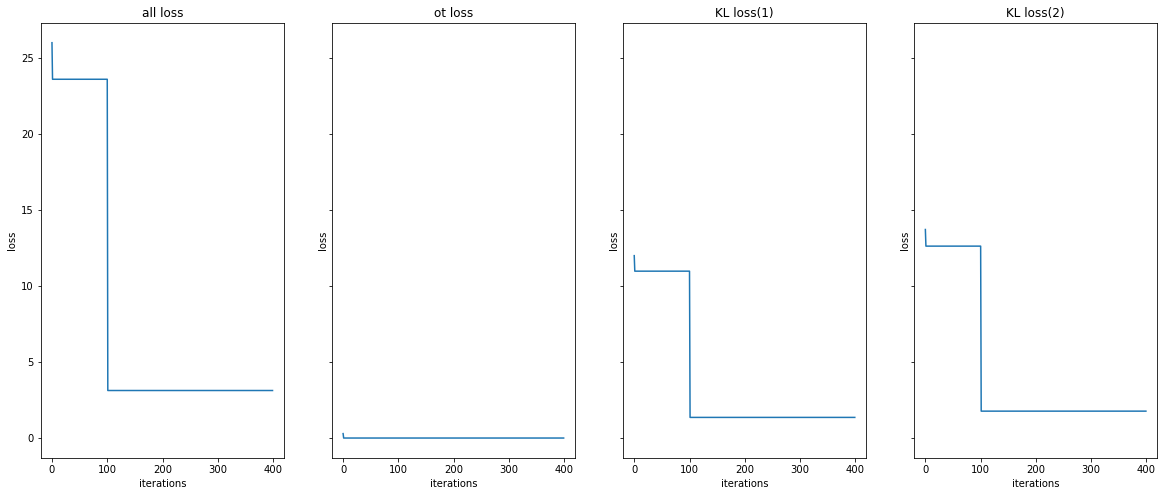

In [225]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), sharey=True)


ax1.plot( np.array(ts1_list[j].ot_loss)*0.3 + ts1_list[j].ce_loss + ts2_list[j].ce_loss)
ax1.set_title('all loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('iterations')

ax2.plot(np.array(ts1_list[j].ot_loss)*0.3)
ax2.set_title('ot loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('iterations')

ax3.plot(ts1_list[j].ce_loss)
ax3.set_title('KL loss(1)')
ax3.set_ylabel('loss')
ax3.set_xlabel('iterations')

ax4.plot(ts2_list[j].ce_loss)
ax4.set_title('KL loss(2)')
ax4.set_ylabel('loss')
ax4.set_xlabel('iterations')


plt.show()



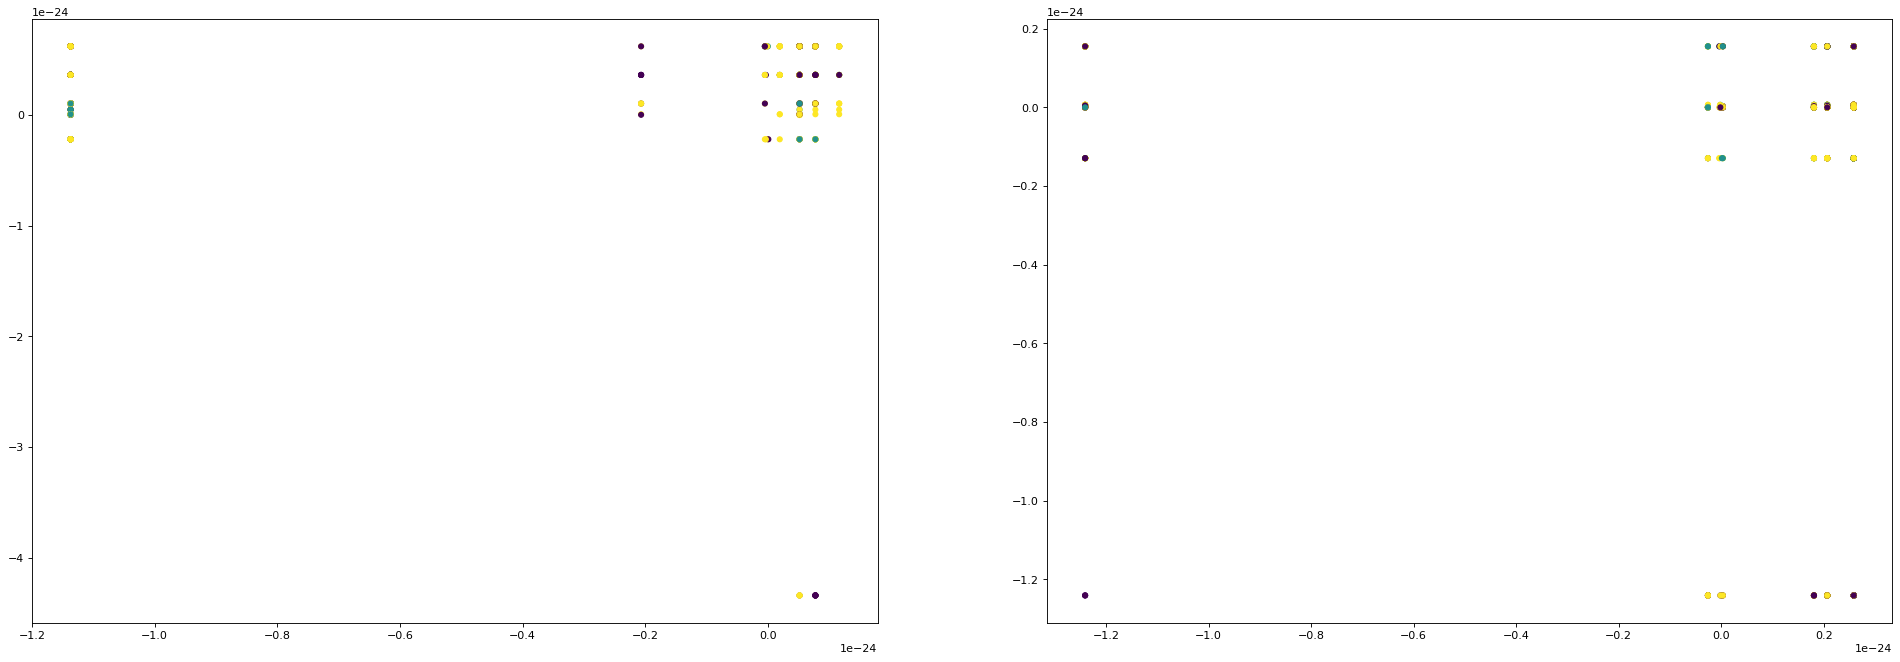

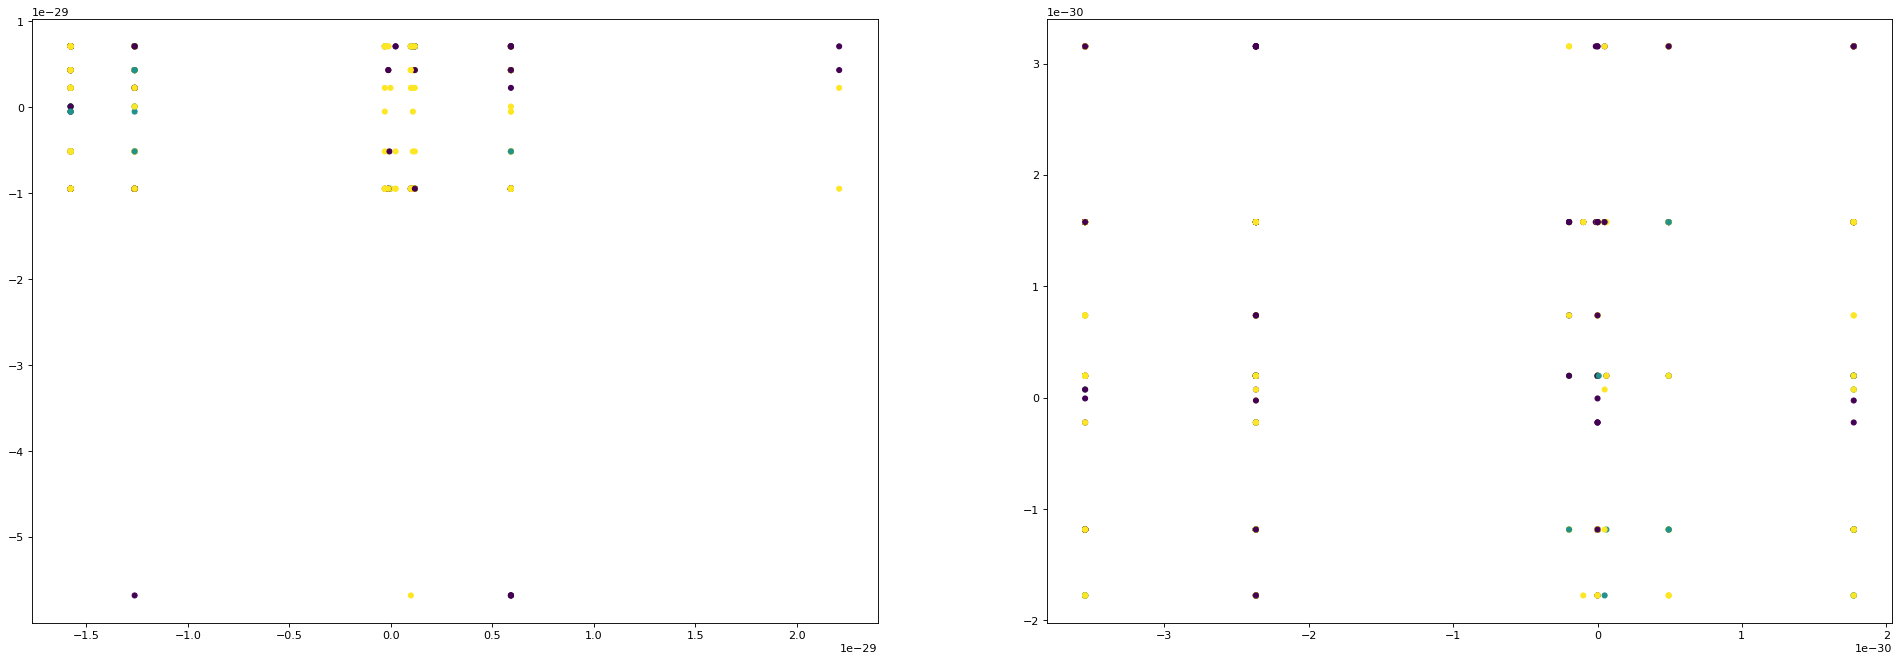

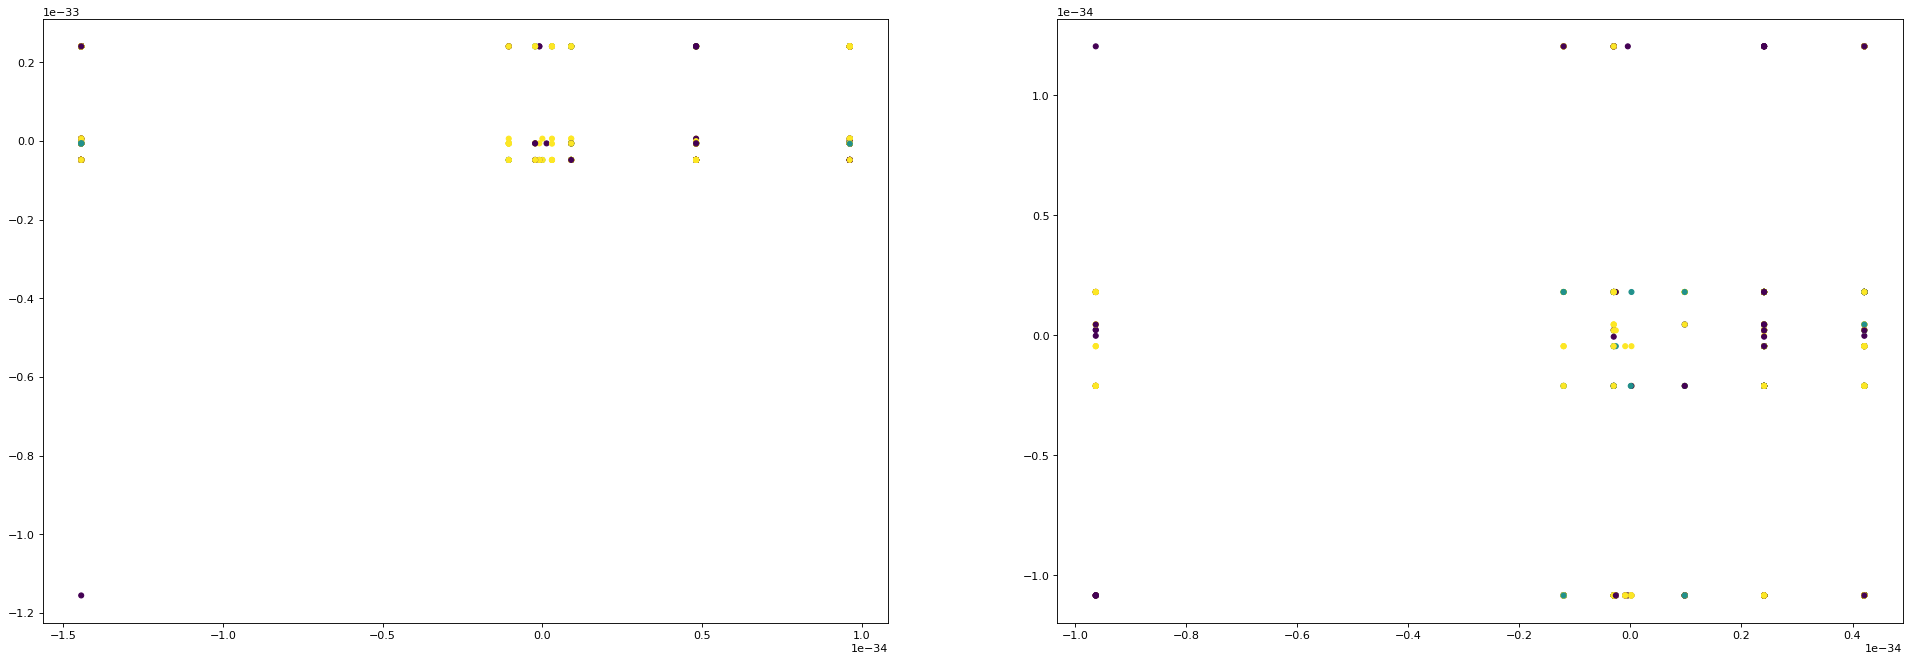

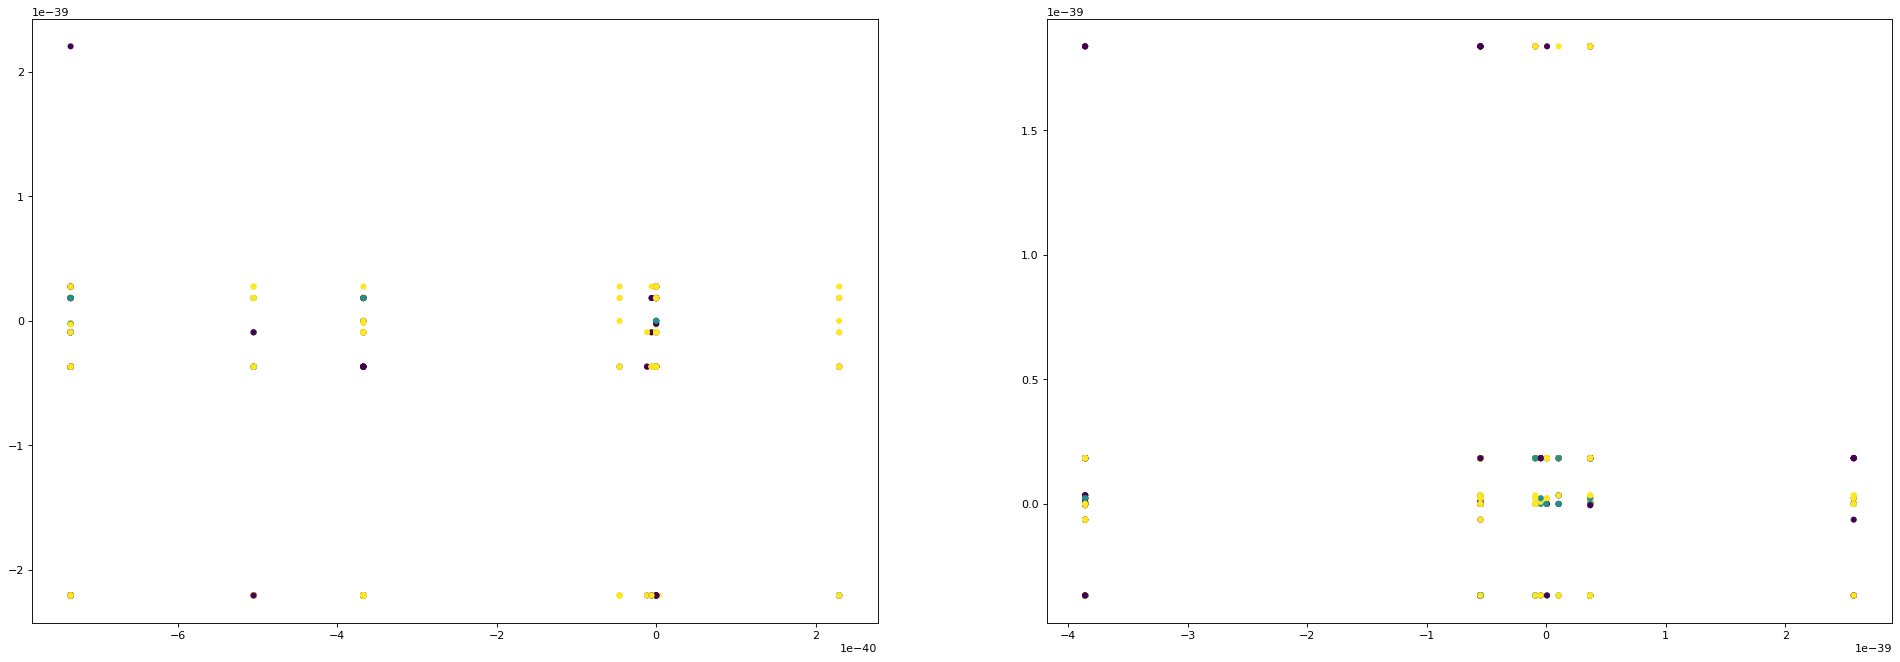

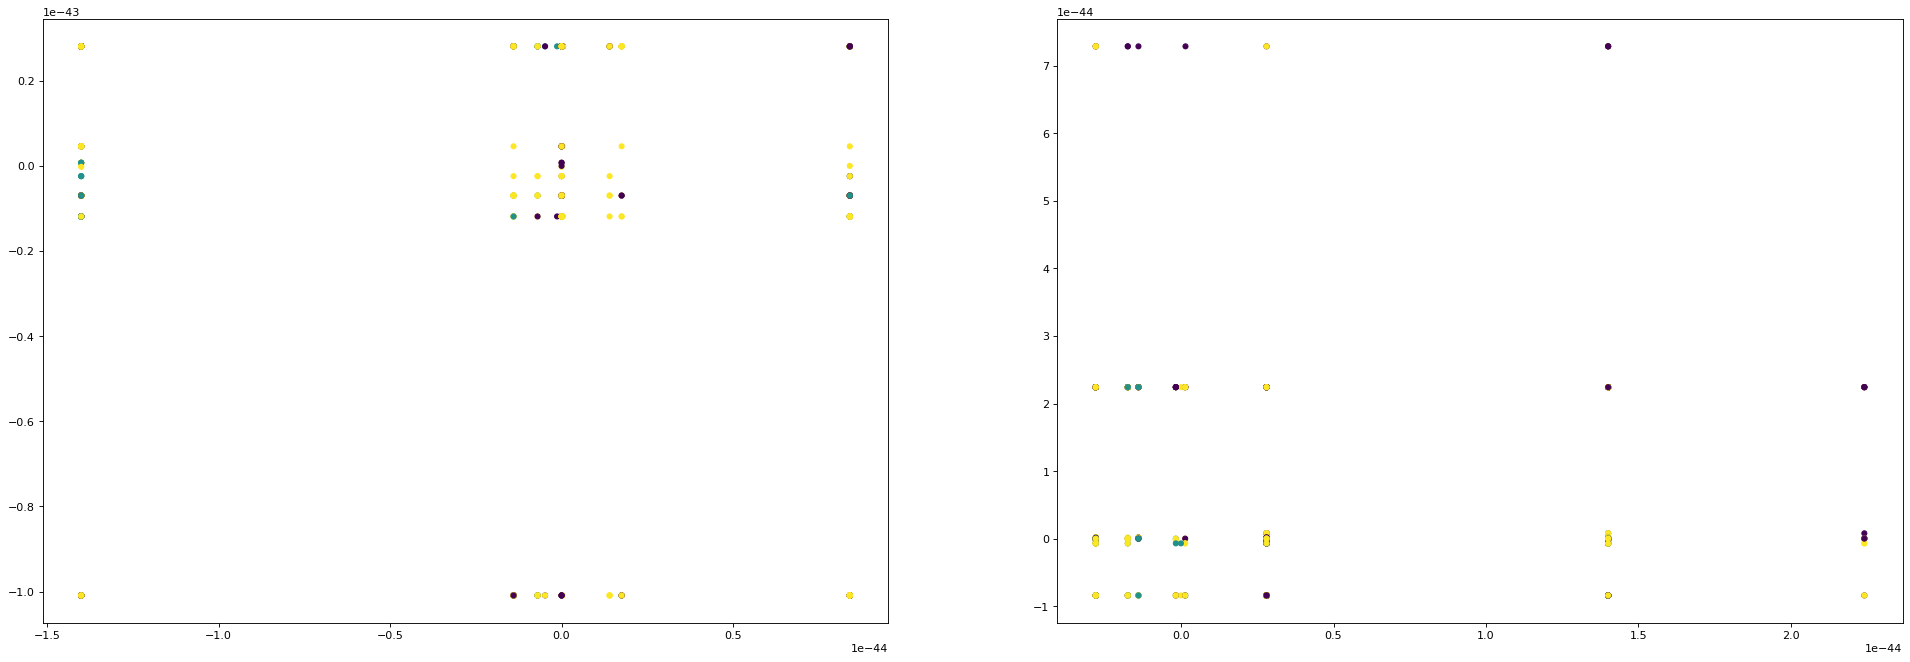

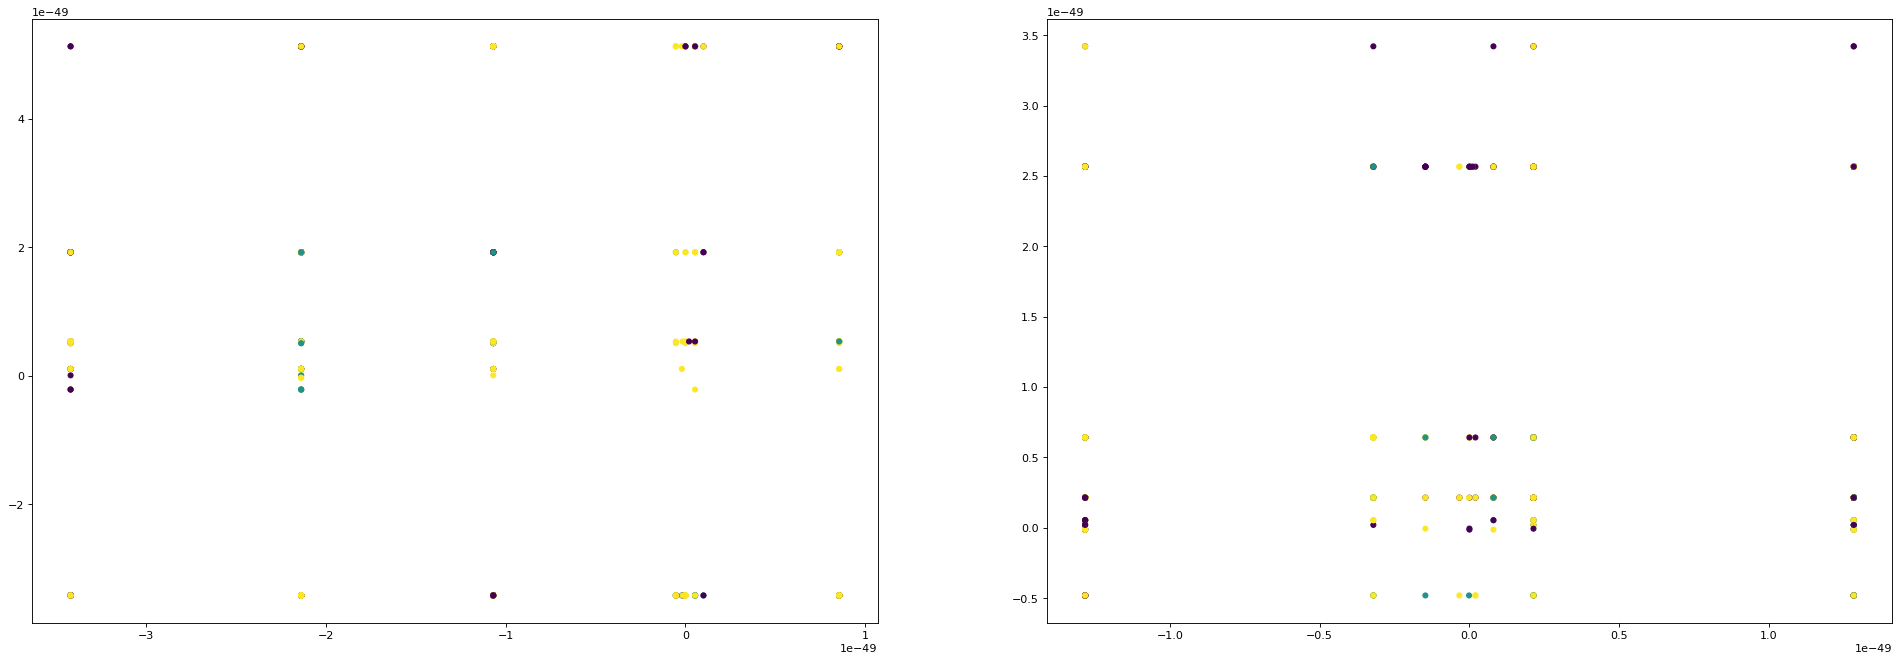

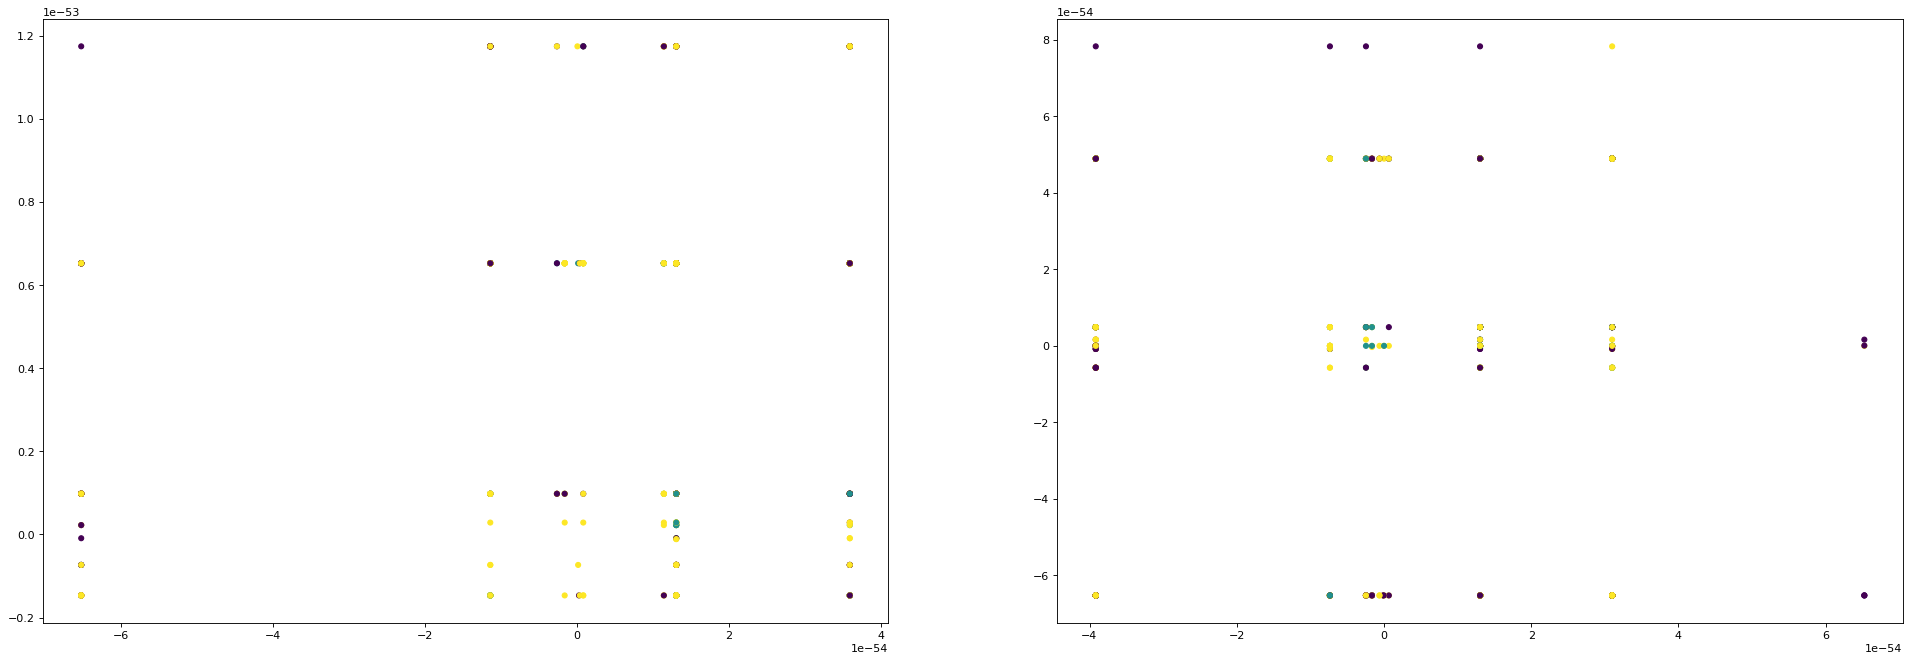

In [226]:
j=0
i = 50
for k in range(1,8):
    
    final_embedding_plot(
        ts1_list[j].embeddings_after_mmd[k*i],
        ts2_list[j].embeddings_after_mmd[k*i],
        timepoint1, timepoint2)



<ipython-input-212-ac6469c732cf>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


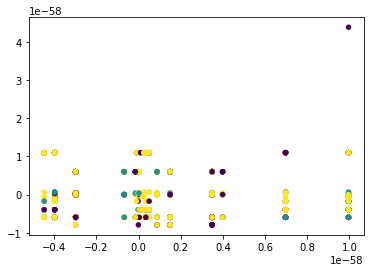

In [227]:
plot_togather(ts1_list[j].Y, ts2_list[j].Y, timepoint1, timepoint2)

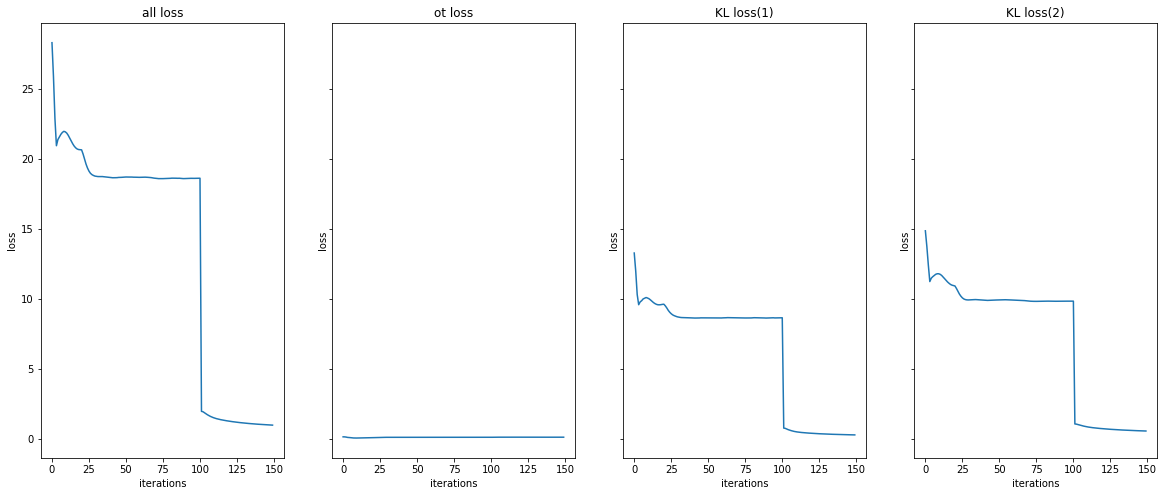

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), sharey=True)


ax1.plot( np.array(ts1_list[j].ot_loss)*0.3 + ts1_list[j].ce_loss + ts2_list[j].ce_loss)
ax1.set_title('all loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('iterations')

ax2.plot(np.array(ts1_list[j].ot_loss)*0.3)
ax2.set_title('ot loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('iterations')

ax3.plot(ts1_list[j].ce_loss)
ax3.set_title('KL loss(1)')
ax3.set_ylabel('loss')
ax3.set_xlabel('iterations')

ax4.plot(ts2_list[j].ce_loss)
ax4.set_title('KL loss(2)')
ax4.set_ylabel('loss')
ax4.set_xlabel('iterations')


plt.show()



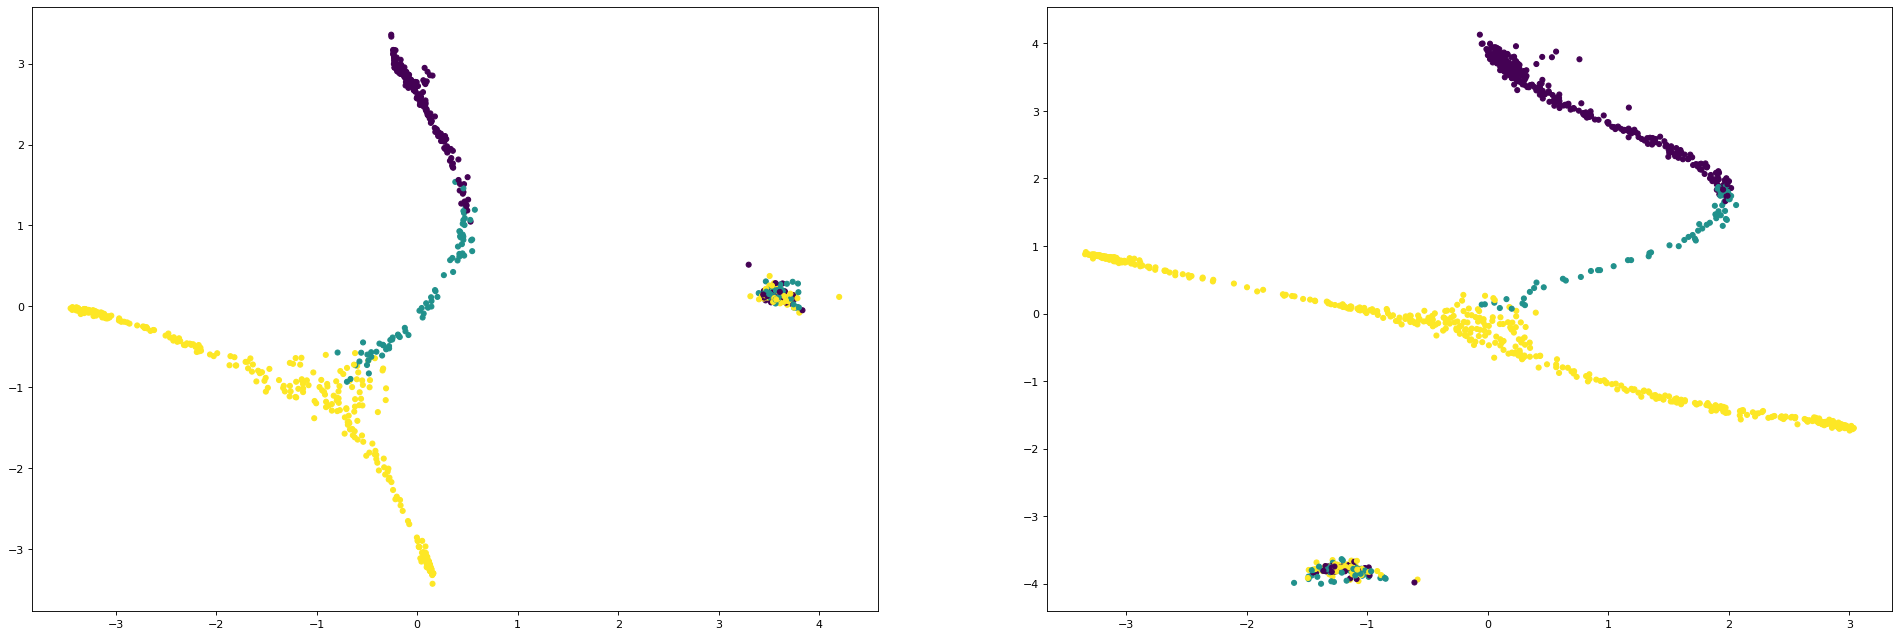

In [16]:
j=2
final_embedding_plot(
    ts1_list[j].Y,
    ts2_list[j].Y,
    timepoint1, timepoint2)

<ipython-input-4-ac6469c732cf>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


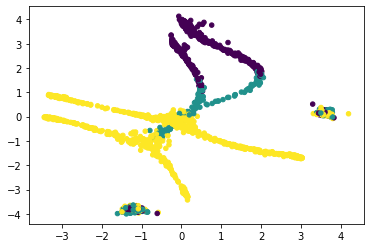

In [17]:
plot_togather(ts1_list[j].Y, ts2_list[j].Y, timepoint1, timepoint2)

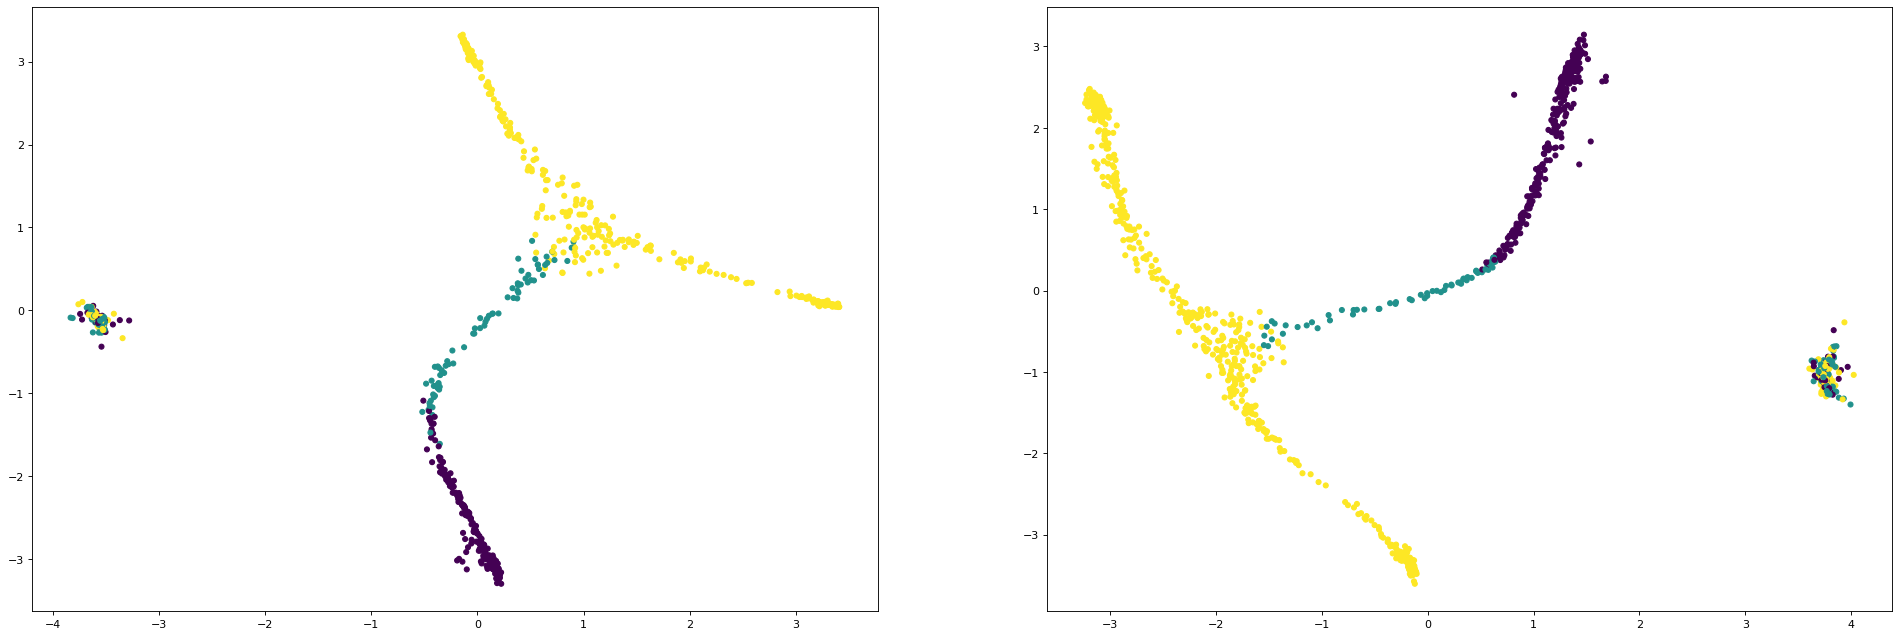

In [18]:
j=3
final_embedding_plot(
    ts1_list[j].Y,
    ts2_list[j].Y,
    timepoint1, timepoint2)

<ipython-input-4-ac6469c732cf>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


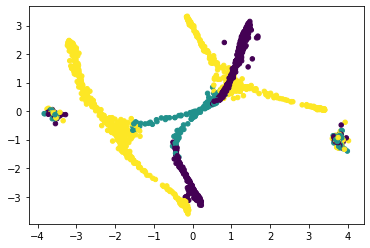

In [19]:
plot_togather(ts1_list[j].Y, ts2_list[j].Y, timepoint1, timepoint2)

In [19]:
# ts1.y2d.shape, ts2.y2d.shape

In [20]:
# ts1.mmd_loss[0].numpy()

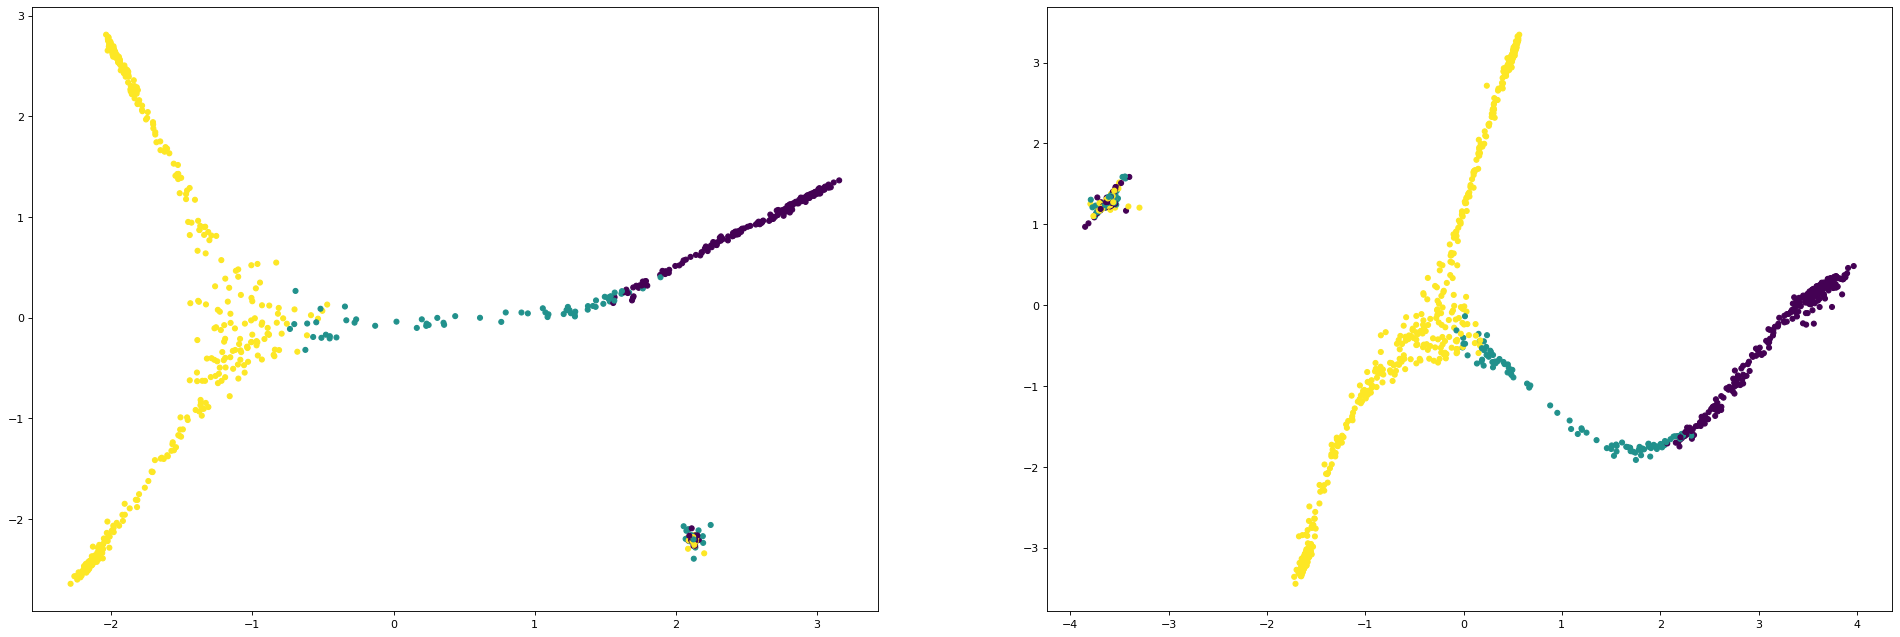

In [15]:

final_embedding_plot(
    u1, u2,
    timepoint1, timepoint2)

<ipython-input-6-ac6469c732cf>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


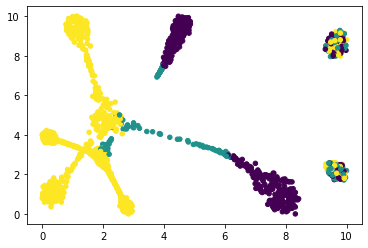

In [22]:
plot_togather(
    10.0 * (e1 - np.min(e1, 0)) / (np.max(e1, 0) - np.min(e1, 0)),
    10.0 * (e2 - np.min(e2, 0)) / (np.max(e2, 0) - np.min(e2, 0)),
    timepoint1, timepoint2)

## Single tsne

In [55]:
tss1 = tsne_single(ts1.Y, no_dims=2, perplexity=200, max_iter=1000)

Computing pairwise distances...
Computing P-values for point 0 of 800...
Computing P-values for point 500 of 800...
Mean value of sigma: 3.203517
Iteration 10: error is 8.837605
Iteration 20: error is 7.412833
Iteration 30: error is 7.194801
Iteration 40: error is 7.118798
Iteration 50: error is 7.090251
Iteration 60: error is 7.079957
Iteration 70: error is 7.071547
Iteration 80: error is 7.066505
Iteration 90: error is 7.061982
Iteration 100: error is 7.058989
Iteration 110: error is 0.110792
Iteration 120: error is 0.090690
Iteration 130: error is 0.079029
Iteration 140: error is 0.071605
Iteration 150: error is 0.067312
Iteration 160: error is 0.064323
Iteration 170: error is 0.062179
Iteration 180: error is 0.060659
Iteration 190: error is 0.059583
Iteration 200: error is 0.058816
Iteration 210: error is 0.058276
Iteration 220: error is 0.057884
Iteration 230: error is 0.057595
Iteration 240: error is 0.057378
Iteration 250: error is 0.057218
Iteration 260: error is 0.057092
Itera

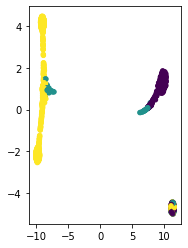

In [56]:
x1 = tss1.Y
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.scatter(x1[:, 0], x1[:, 1], 20, timepoint1)


In [57]:
tss2 = tsne_single(ts2.Y, no_dims=2, perplexity=200, max_iter=1000)

Computing pairwise distances...
Computing P-values for point 0 of 1200...
Computing P-values for point 500 of 1200...
Computing P-values for point 1000 of 1200...
Mean value of sigma: 4.489931
Iteration 10: error is 10.484084
Iteration 20: error is 7.966897
Iteration 30: error is 7.225562
Iteration 40: error is 7.104734
Iteration 50: error is 7.094852
Iteration 60: error is 7.081362
Iteration 70: error is 7.060347
Iteration 80: error is 7.041810
Iteration 90: error is 7.027943
Iteration 100: error is 7.017264
Iteration 110: error is 0.186069
Iteration 120: error is 0.141864
Iteration 130: error is 0.129399
Iteration 140: error is 0.122235
Iteration 150: error is 0.117477
Iteration 160: error is 0.113612
Iteration 170: error is 0.110513
Iteration 180: error is 0.108077
Iteration 190: error is 0.106164
Iteration 200: error is 0.104642
Iteration 210: error is 0.103397
Iteration 220: error is 0.102359
Iteration 230: error is 0.101477
Iteration 240: error is 0.100728
Iteration 250: error is

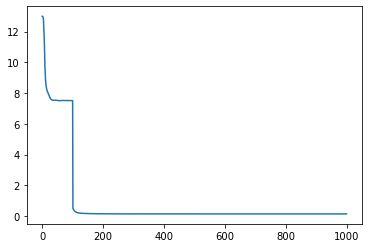

In [143]:
plt.plot(ts2.ce_loss)

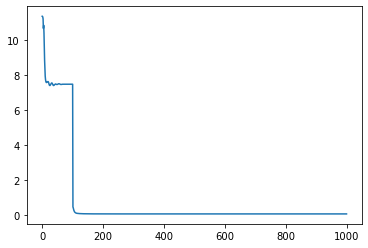

In [144]:
plt.plot(ts1.ce_loss)

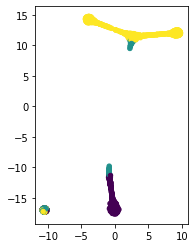

In [58]:
x2 = tss2.Y
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.scatter(x2[:, 0], x2[:, 1], 20, timepoint2)



## Applied tSNE-MMD 10 ---> 2

In [134]:
embedding1_list, embedding2_list ,_ = generate_results(ts1.Y, ts2.Y, n_repeat=1,
                                                       no_dims=2, perplexity=200, max_iter=1000,
                                                       mmd_coef = 20.0, mmd_kernel=gaussian_kernel_matrix)

# tsne(X1, X2, no_dims=30, perplexity=70, max_iter=1000, mmd_coef = 1.0, mmd_radius=1.0, mmd_kernel= t_distribution_kernel_matrix):


********** replication:1 ********
Computing pairwise distances...
Computing P-values for point 0 of 800...
Computing P-values for point 500 of 800...
Mean value of sigma: 3.203517
Computing pairwise distances...
Computing P-values for point 0 of 1200...
Computing P-values for point 500 of 1200...
Computing P-values for point 1000 of 1200...
Mean value of sigma: 4.489931
Iteration 10: error is 8.977235
Iteration 10: error is 10.713309
Iteration 20: error is 7.461924
Iteration 20: error is 7.814652
Iteration 30: error is 7.200692
Iteration 30: error is 7.177533
Iteration 40: error is 7.131931
Iteration 40: error is 7.079838
Iteration 50: error is 7.103122
Iteration 50: error is 7.055725
Iteration 60: error is 7.090114
Iteration 60: error is 7.027899
Iteration 70: error is 7.082346
Iteration 70: error is 7.018853
Iteration 80: error is 7.077040
Iteration 80: error is 7.015073
Iteration 90: error is 7.074379
Iteration 90: error is 7.004560
Iteration 100: error is 7.071025
Iteration 100: er

In [135]:
ets1 = embedding1_list[0]
ets2 = embedding2_list[0]

mmd_coef=20 - iter= 1000

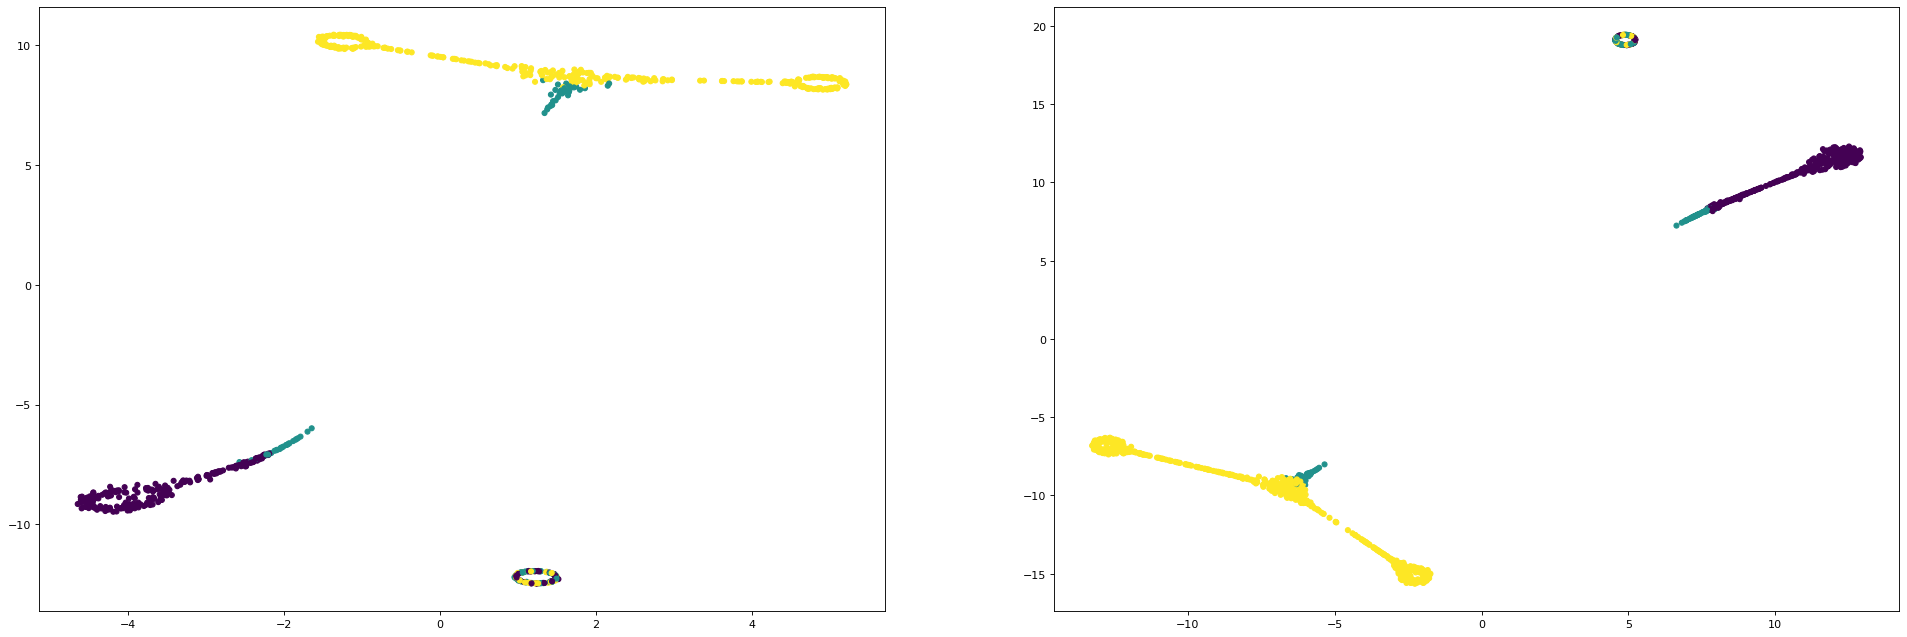

In [136]:
final_embedding_plot(ets1.Y, ets2.Y, timepoint1, timepoint2)

<ipython-input-65-ac6469c732cf>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


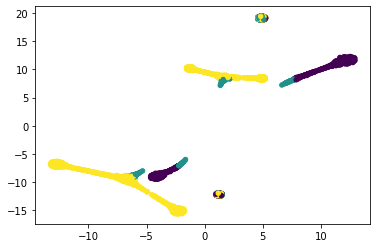

In [137]:
plot_togather(ets1.Y, ets2.Y,
    timepoint1, timepoint2)

In [138]:
ets1.ce_loss

[11.919668227211979,
 11.47193638691539,
 10.984058663148069,
 11.006282413267298,
 10.814456929495682,
 10.601107629949686,
 10.293440453157105,
 9.858987848449367,
 9.353715269552291,
 8.977234615470467,
 8.60790267749783,
 8.336005614865746,
 8.111064419308015,
 7.9361062289325774,
 7.795296155494619,
 7.681924964715823,
 7.600337356212509,
 7.540766869717889,
 7.497065217305181,
 7.461924064096844,
 7.437577059976572,
 7.410300035276591,
 7.378975353989335,
 7.344707585190172,
 7.312635266028346,
 7.284470760189794,
 7.258639638897095,
 7.235999445128055,
 7.216700104914386,
 7.200691599450095,
 7.188225392239867,
 7.17855407371041,
 7.170152529533652,
 7.1624093055011215,
 7.15537952270511,
 7.14906117861496,
 7.144069775679791,
 7.1400335607210055,
 7.136331229722759,
 7.1319312480158645,
 7.127239510066816,
 7.123834985422861,
 7.121312355146665,
 7.118860698700044,
 7.116044834304913,
 7.112683519902663,
 7.109470275034628,
 7.106762955061597,
 7.1048164920588475,
 7.1031219265

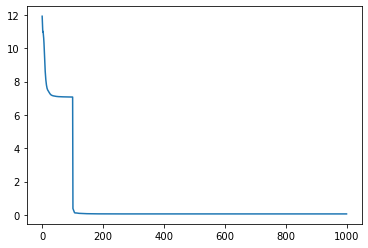

In [139]:
plt.plot(np.array(ets1.ce_loss))



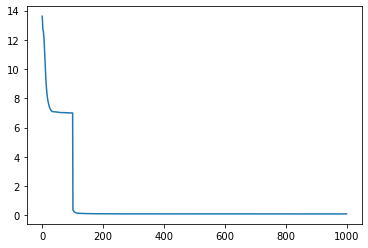

In [140]:
plt.plot(np.array(ets2.ce_loss))



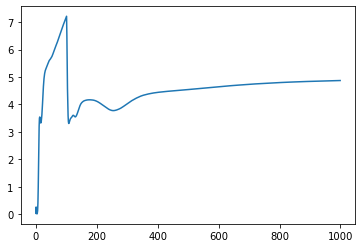

In [142]:
plt.plot(np.array(ets1.mmd_loss)*20)


coef=40 - iter= 1000

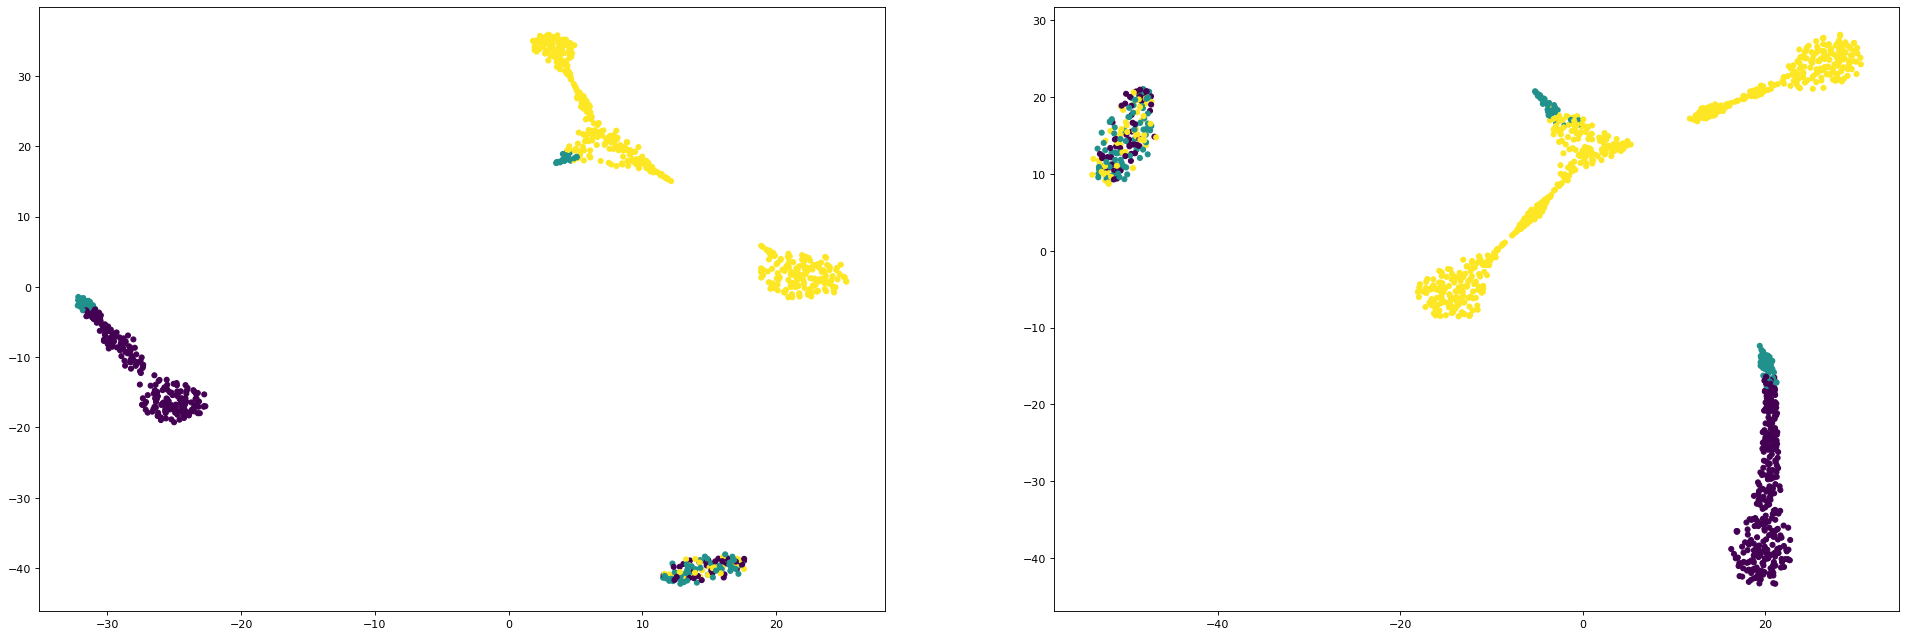

In [26]:
final_embedding_plot(ets1.Y, ets2.Y, timepoint1, timepoint2)

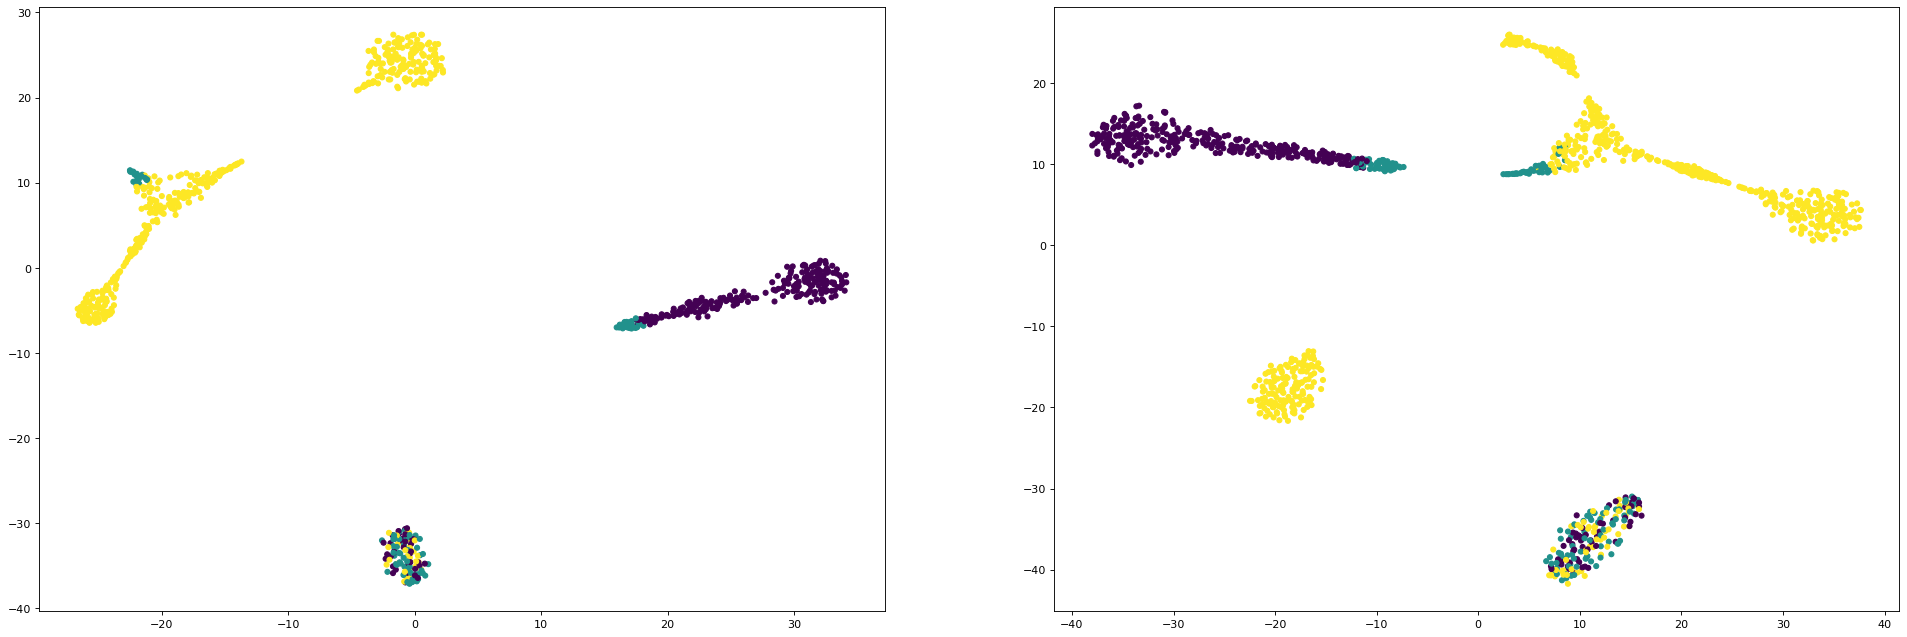

In [23]:
final_embedding_plot(ets1.Y, ets2.Y, timepoint1, timepoint2)

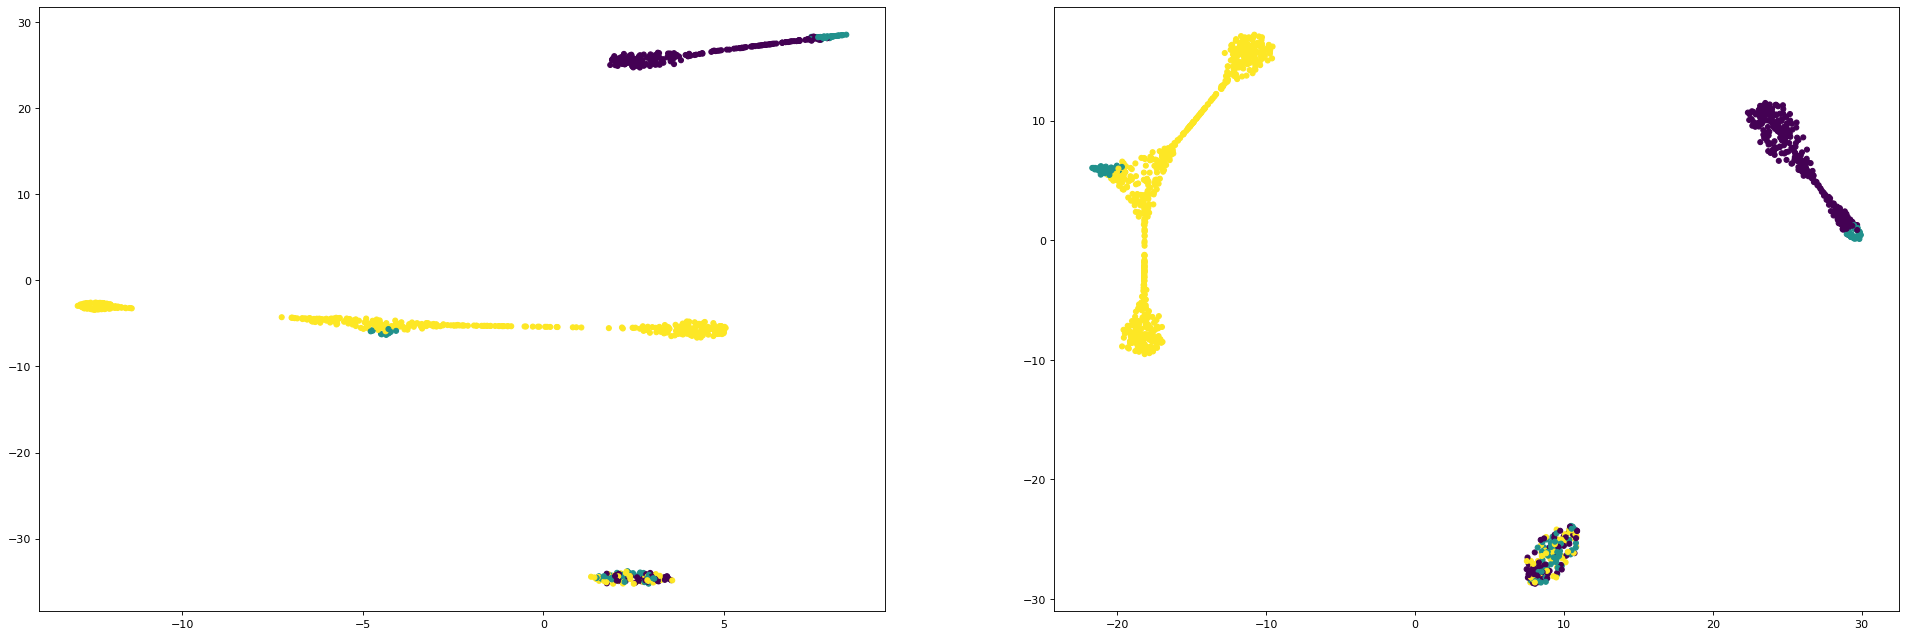

In [11]:
final_embedding_plot(ets1.Y, ets2.Y, timepoint1, timepoint2)

In [12]:
u1 = pca(ts1.Y, no_dims=2)
u2 = pca(ts2.Y, no_dims=2)

Preprocessing the data using PCA...
Preprocessing the data using PCA...


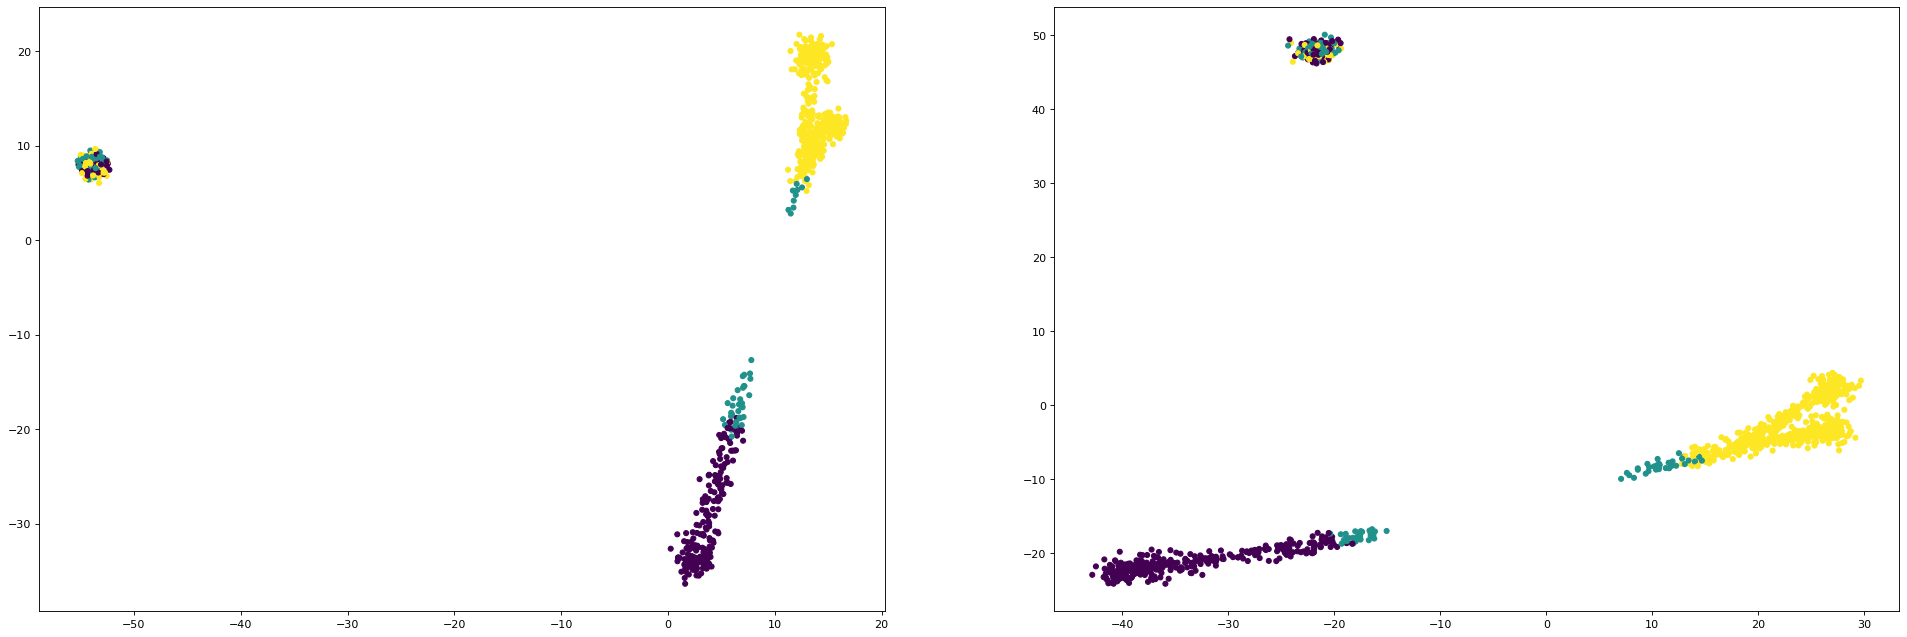

In [13]:
final_embedding_plot(u1, u2, timepoint1, timepoint2)

In [87]:
u2.shape

(1200, 2)

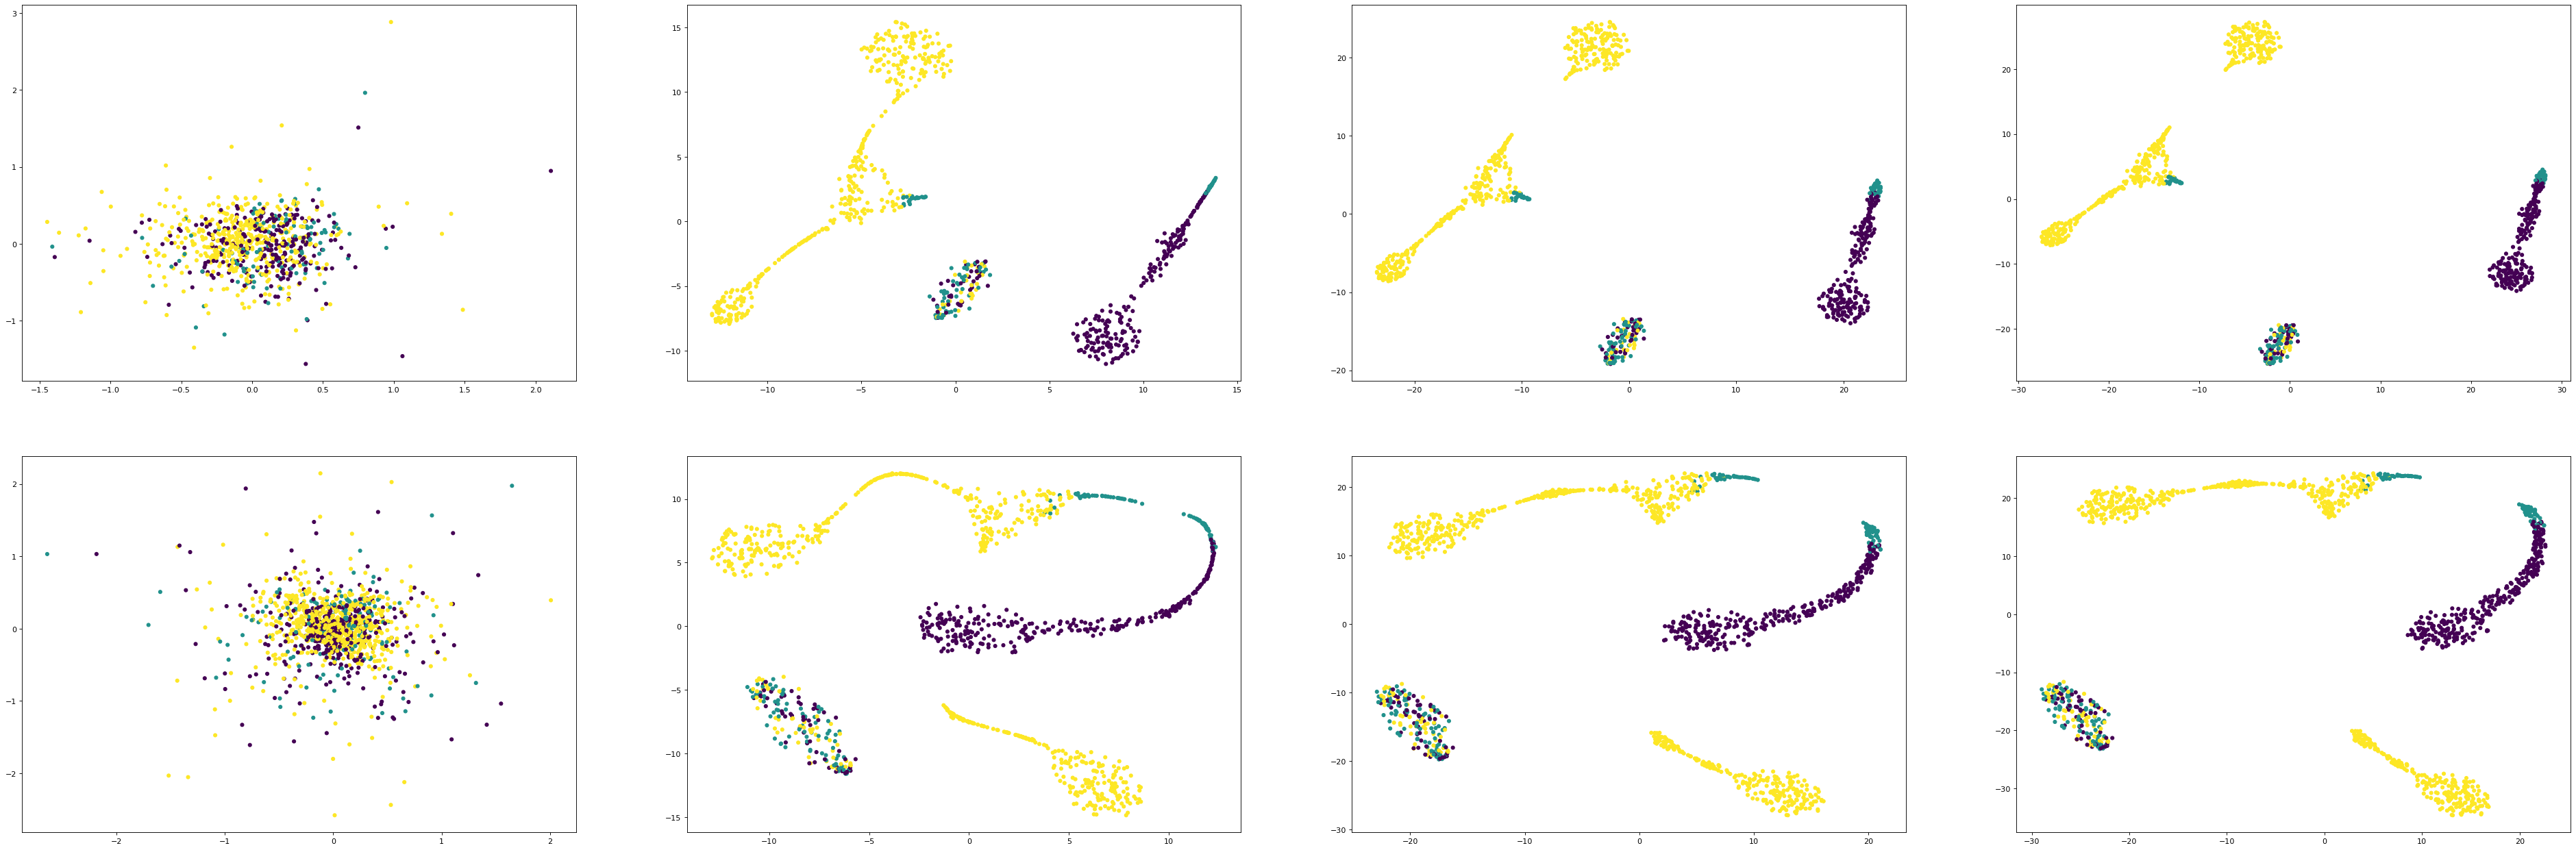

In [30]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(60, 20), dpi=80)  # create a plot figure

k = 150
n_plots = 4
for i in range(n_plots):
    
    plt.subplot(2, n_plots, i+1) # (rows, columns, panel number)
    plt.scatter(ets1.embeddings_after_mmd[i*k+1][:, 0], ets1.embeddings_after_mmd[i*k+1][:, 1], 20, timepoint1)
    plt.subplot(2, n_plots, i+1+n_plots) # (rows, columns, panel number)
    plt.scatter(ets2.embeddings_after_mmd[i*k+1][:, 0], ets2.embeddings_after_mmd[i*k+1][:, 1], 20, timepoint2)
#     plt.subplot(2, n_plots, i+1+n_plots) # (rows, columns, panel number)
#     plt.scatter(ets2.embeddings_after_mmd[i*k+1][:, 0], ets2.embeddings_after_mmd[i*k+1][:, 1], 20, timepoint2)




In [95]:
scmm

NameError: name 'scmm' is not defined

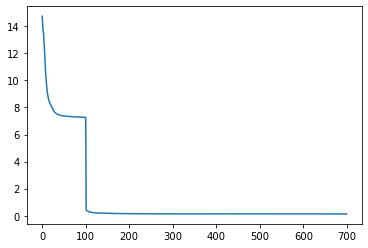

In [45]:
plt.plot(ets1.ce_loss);

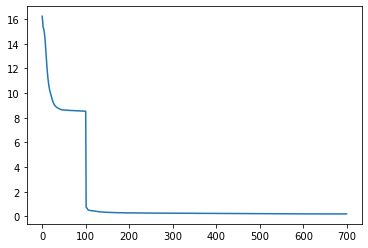

In [46]:
plt.plot(ets2.ce_loss);

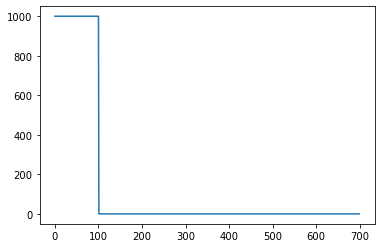

In [47]:
plt.plot(ets2.mmd_loss);

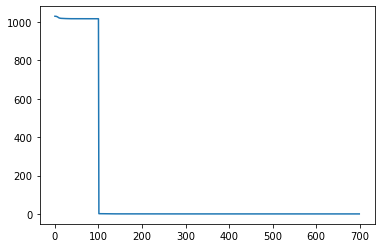

In [48]:
plt.plot((np.array([ts1.mmd_loss]) + np.array([ts1.ce_loss]) + np.array([ts2.ce_loss])).reshape(-1));

In [171]:
import networkx as nx
G = nx.path_graph(4)


In [172]:
pos = nx.spring_layout(G)

In [181]:
x = []
y = []
for item in pos.keys():
    x.append(pos[item][0])
    y.append(pos[item][1])

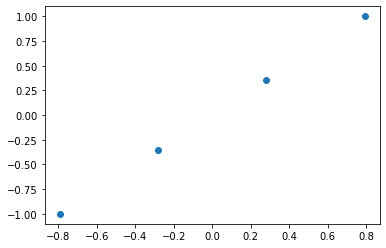

In [183]:
plt.scatter(x,y)

In [184]:
pos

{0: array([0.79040505, 1.        ]),
 1: array([0.27989841, 0.3541118 ]),
 2: array([-0.27989491, -0.35411982]),
 3: array([-0.79040855, -0.99999198])}

AttributeError: 'dict' object has no attribute 'edges'

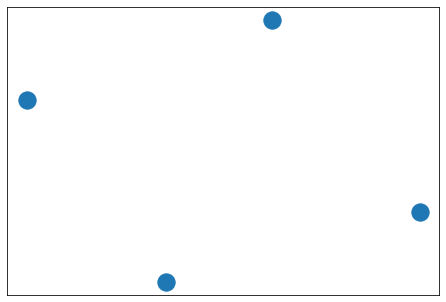

In [187]:
nx.draw(pos)